In [2]:
%load_ext autoreload
%autoreload 2

In [28]:
import time
import utils
import math
import numpy as np
import matplotlib.pyplot as plt

In [29]:
NETWORK_DIM = 1340
c = 0.134

In [30]:
print(f"n patterns: {math.floor(c * NETWORK_DIM)}")
patterns = utils.get_n_binary_patterns(
            n_patterns=math.floor(c * NETWORK_DIM),
            pattern_dim=NETWORK_DIM,
            plot=False,
            check_overlaps=False
        )
current_state = np.random.binomial(1, 0.5, size=(NETWORK_DIM,))*2 - 1
print(current_state)
weights = utils.get_weights(patterns, self_connections=True)

n patterns: 179
[1 1 1 ... 1 1 1]


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.338e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <BarContainer object of 10 artists>)

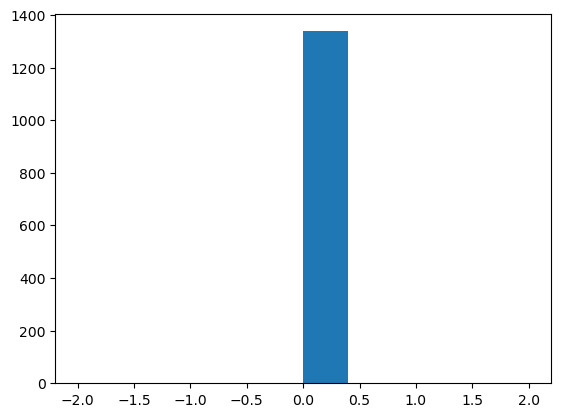

In [41]:
ns_standard = utils.compute_next_state(current_state, weights)
ns_overlap = utils.compute_next_state_with_overlaps(current_state, patterns)
plt.hist(ns_standard - ns_overlap)

In [10]:
n_trials = 5
net_dim = [10, 100, 1000, 2000, 5000]
standard_time_bydim = []
overlap_time_bydim = []

for d in net_dim:
    standard_times = []
    overlap_times = []
    for i in range(n_trials):
        patterns = utils.get_n_binary_patterns(
            n_patterns=math.floor(c * d),
            pattern_dim=d,
            plot=False,
            check_overlaps=False
        )
        
        current_state = np.random.binomial(1, 0.5, size=(d,))*2 - 1
        
        start_time = time.time()
        
        weights = utils.get_weights(patterns)
        n1 = utils.compute_next_state(current_state, weights)
        
        end_time = time.time()
        standard_times.append(end_time - start_time)
        
        start_time = time.time()
        
        n2 = utils.compute_next_state_with_overlaps(current_state, patterns)
        
        end_time = time.time()
        overlap_times.append(end_time - start_time)
        
    standard_times = np.array(standard_times)
    overlap_times = np.array(overlap_times)
    
    standard_time_bydim.append((np.mean(standard_times), np.std(standard_times)))
    overlap_time_bydim.append((np.mean(overlap_times), np.std(overlap_times)))

standard_time_bydim = np.array(standard_time_bydim)
overlap_time_bydim = np.array(overlap_time_bydim)

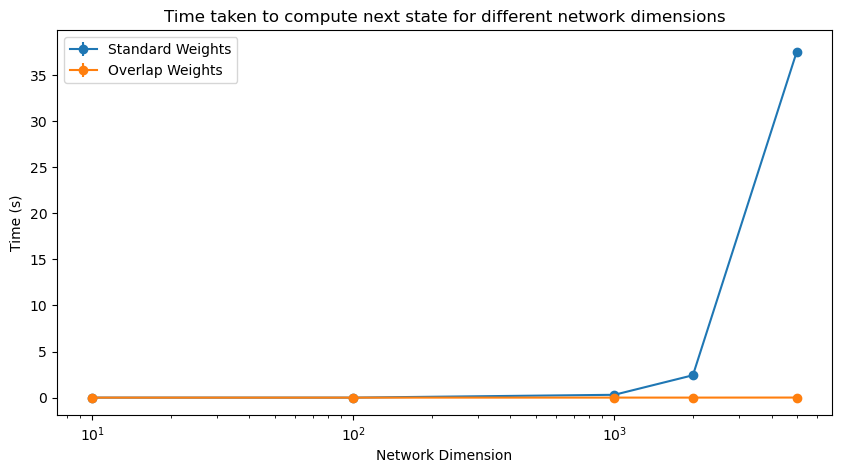

In [11]:
plt.figure(figsize=(10, 5))
plt.errorbar(net_dim, standard_time_bydim[:, 0], yerr=standard_time_bydim[:, 1], label='Standard Weights', fmt='o-')
plt.errorbar(net_dim, overlap_time_bydim[:, 0], yerr=overlap_time_bydim[:, 1], label='Overlap Weights', fmt='o-')
plt.xscale('log')
plt.xlabel('Network Dimension')
plt.ylabel('Time (s)')
plt.title('Time taken to compute next state for different network dimensions')
plt.legend()

In [12]:
n_trials = 5
net_dim = [10, 100, 1000, 2000, 5000]
standard_time_bydim = []
overlap_time_bydim = []

for d in net_dim:
    standard_times = []
    overlap_times = []
    for i in range(n_trials):
        patterns = utils.get_n_binary_patterns(
            n_patterns=math.floor(c * d),
            pattern_dim=d,
            plot=False,
            check_overlaps=False
        )
        
        current_state = np.random.binomial(1, 0.5, size=(d,))*2 - 1
        weights = utils.get_weights(patterns)
        
        start_time = time.time()
        
        n1 = utils.compute_next_state(current_state, weights)
        
        end_time = time.time()
        standard_times.append(end_time - start_time)
        
        start_time = time.time()
        
        n2 = utils.compute_next_state_with_overlaps(current_state, patterns)
        
        end_time = time.time()
        overlap_times.append(end_time - start_time)
        
    standard_times = np.array(standard_times)
    overlap_times = np.array(overlap_times)
    
    standard_time_bydim.append((np.mean(standard_times), np.std(standard_times)))
    overlap_time_bydim.append((np.mean(overlap_times), np.std(overlap_times)))

standard_time_bydim = np.array(standard_time_bydim)
overlap_time_bydim = np.array(overlap_time_bydim)

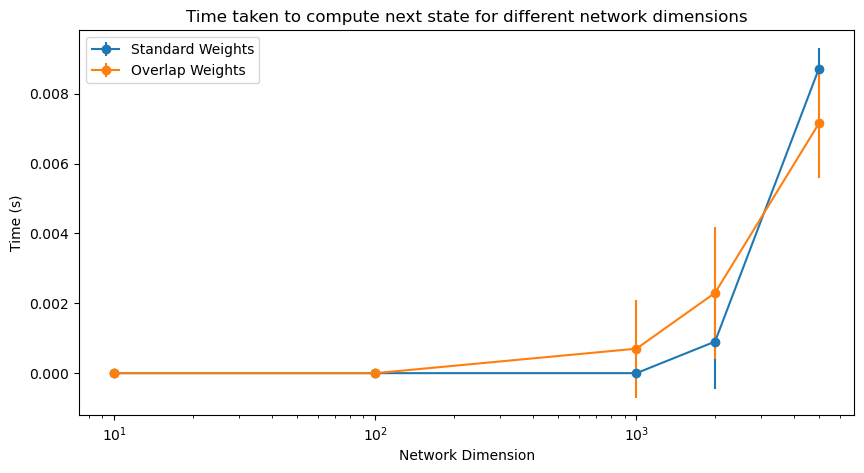

In [13]:
plt.figure(figsize=(10, 5))
plt.errorbar(net_dim, standard_time_bydim[:, 0], yerr=standard_time_bydim[:, 1], label='Standard Weights', fmt='o-')
plt.errorbar(net_dim, overlap_time_bydim[:, 0], yerr=overlap_time_bydim[:, 1], label='Overlap Weights', fmt='o-')
plt.xscale('log')
plt.xlabel('Network Dimension')
plt.ylabel('Time (s)')
plt.title('Time taken to compute next state for different network dimensions')
plt.legend()